# Import necessary library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import scipy.io
from scipy.io import loadmat
import matplotlib.cm as cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data read

In [ ]:
#fln = './Data_classification/BRS_stab_data.mat'
fln = '/content/drive/My Drive/Data_classification/BRS_stab_data.mat'
mat_data = loadmat(fln)

x = np.array(mat_data['samples'])
labels = np.array(mat_data['response'])

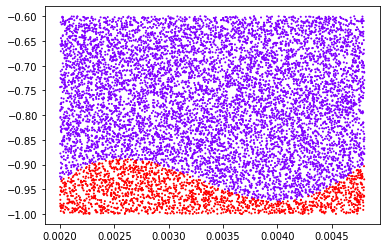

In [ ]:
colors = cm.rainbow(np.linspace(0, 1, 2))
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:,0],x[:,1],color=colors[labels[:,0]],s=1) 


In [ ]:
print(x.shape)
print(labels.shape)
print(x)

(10000, 2)
(10000, 1)
[[ 0.00412333 -0.89279741]
 [ 0.00396238 -0.84115072]
 [ 0.0046719  -0.61332227]
 ...
 [ 0.00218999 -0.99455399]
 [ 0.00219945 -0.90597963]
 [ 0.00474249 -0.62642856]]


# 2. Definition of the neural network

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


Now we train our network.

In [ ]:
xx_data = x
yy = labels

# # Training of the neural network
hist = model.fit(xx_data, yy, batch_size=3, epochs=200, verbose=1, validation_split=0.25)

Epoch 1/200
2500/2500 [==============================] - 3s 1ms/step - loss: 0.4768 - accuracy: 0.8241 - val_loss: 0.4420 - val_accuracy: 0.8244
Epoch 2/200
2500/2500 [==============================] - 2s 944us/step - loss: 0.3996 - accuracy: 0.8241 - val_loss: 0.3608 - val_accuracy: 0.8244
Epoch 3/200
2500/2500 [==============================] - 2s 957us/step - loss: 0.3264 - accuracy: 0.8267 - val_loss: 0.2992 - val_accuracy: 0.8464
Epoch 4/200
2500/2500 [==============================] - 2s 958us/step - loss: 0.2731 - accuracy: 0.8621 - val_loss: 0.2550 - val_accuracy: 0.8896
Epoch 5/200
2500/2500 [==============================] - 2s 934us/step - loss: 0.2383 - accuracy: 0.9057 - val_loss: 0.2264 - val_accuracy: 0.9180
Epoch 6/200
2500/2500 [==============================] - 2s 953us/step - loss: 0.2138 - accuracy: 0.9252 - val_loss: 0.2064 - val_accuracy: 0.9212
Epoch 7/200
2500/2500 [==============================] - 2s 944us/step - loss: 0.1963 - accuracy: 0.9288 - val_loss: 0.1

# 3 Training visualization

Text(0, 0.5, 'Accuracy')

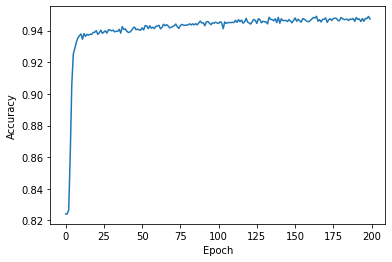

In [ ]:
acc_history = hist.history['accuracy']
%matplotlib inline
plt.plot(acc_history)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [ ]:
pred = np.round(model.predict(xx_data))
accuracy = tf.metrics.Accuracy()
acc = accuracy(labels,pred).numpy()
print('Accuracy is ', 100*acc, '%')

Accuracy is  94.760000705719 %


Text(0, 0.5, 'Loss')

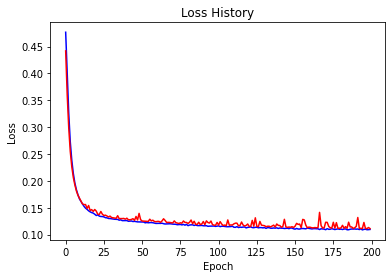

In [ ]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
%matplotlib inline
plt.plot(loss_train,'b')
plt.plot(loss_val,'r')
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# 4. Prediction visualization

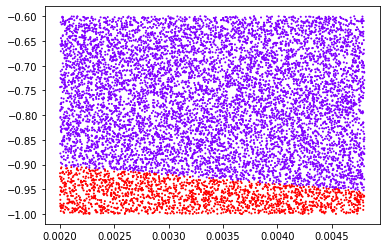

In [ ]:
# Visualize the result from the neural network
pred = np.array(pred)
pred = pred.astype(int)

%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x[:,0],x[:,1],color=colors[pred[:,0]],s=1) 